In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.metrics import classification_report,confusion_matrix

In [6]:
df = pd.read_csv("candy-data.csv")


In [7]:
df.count()

competitorname      85
chocolate           85
fruity              85
caramel             85
peanutyalmondy      85
nougat              85
crispedricewafer    85
hard                85
bar                 85
pluribus            85
sugarpercent        85
pricepercent        85
winpercent          85
dtype: int64

In [8]:
df = df.drop(['competitorname'], axis =1)

In [9]:
df.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [10]:
from sklearn.model_selection import train_test_split


In [11]:
trainSet, testSet = train_test_split(df, test_size=0.2,random_state=53)

In [12]:
train_df = trainSet
test_df = testSet

In [13]:
x_train = train_df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard','bar','pluribus','sugarpercent','pricepercent','winpercent']]
y_train =train_df['chocolate']
x_test = test_df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard','bar','pluribus','sugarpercent','pricepercent','winpercent']]
y_test =test_df['chocolate']

In [14]:
x_train.shape, y_train.shape

((68, 11), (68,))

In [15]:
y_train.value_counts()

chocolate
0    40
1    28
Name: count, dtype: int64

In [16]:
x_train.value_counts()


fruity  caramel  peanutyalmondy  nougat  crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  winpercent
0       0        0               0       0                 0     0    0         0.011         0.116         32.261086     1
                                                                                              0.511         46.116505     1
                                                                                0.313         0.511         43.068897     1
                                                                      1         0.093         0.023         37.722336     1
                                                                                0.127         0.093         55.375454     1
                                                                                                                         ..
1       0        0               0       0                 1     0    1         0.569         0.058         34.578991     1
             

C:\Users\HP\AppData\Local\Temp\ipykernel_48436\2231132847.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='chocolate', data=train_df, palette='Blues_d')


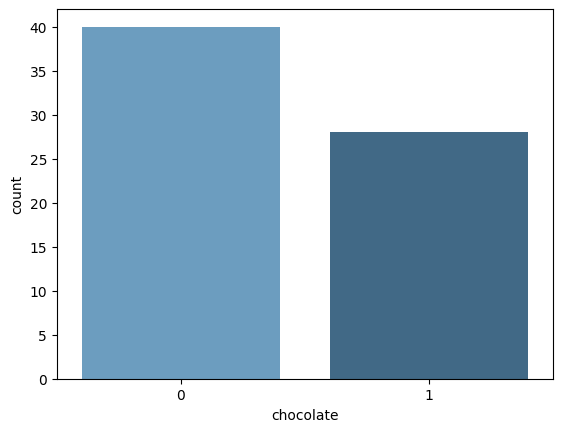

<Figure size 640x480 with 0 Axes>

In [17]:
sns.countplot(x='chocolate', data=train_df, palette='Blues_d')
plt.show()
plt.savefig('count_plot')

In [18]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

In [19]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[8, 0],
       [3, 6]])

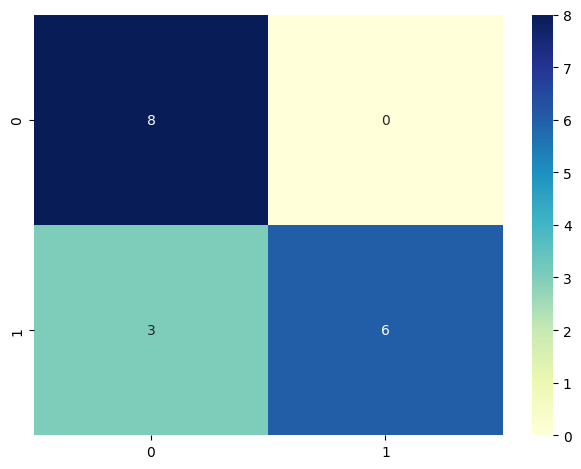

In [20]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(cnf_matrix),annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

In [21]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))

Accuracy: 0.8235294117647058
Precision: 1.0
Recall: 0.6666666666666666
